In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("housing.csv")


In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.2)

In [14]:
train_data = X_train.join(y_train)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5334,-118.46,34.04,25.0,2142.0,718.0,1390.0,699.0,3.0069,<1H OCEAN,325000.0
15704,-122.43,37.79,52.0,3219.0,969.0,1152.0,830.0,4.2042,NEAR BAY,500001.0
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,INLAND,132500.0
12449,-114.68,33.49,20.0,1491.0,360.0,1135.0,303.0,1.6395,INLAND,44400.0
2910,-119.04,35.36,36.0,1942.0,414.0,1051.0,411.0,1.8362,INLAND,66900.0
...,...,...,...,...,...,...,...,...,...,...
4030,-118.53,34.18,16.0,7194.0,1976.0,3687.0,1894.0,3.1887,<1H OCEAN,189300.0
2081,-119.82,36.76,46.0,2194.0,563.0,924.0,542.0,1.4028,INLAND,68500.0
19046,-121.85,38.43,2.0,790.0,135.0,235.0,87.0,5.0862,INLAND,166500.0
4449,-118.21,34.07,31.0,1453.0,404.0,1486.0,389.0,2.3859,<1H OCEAN,153100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

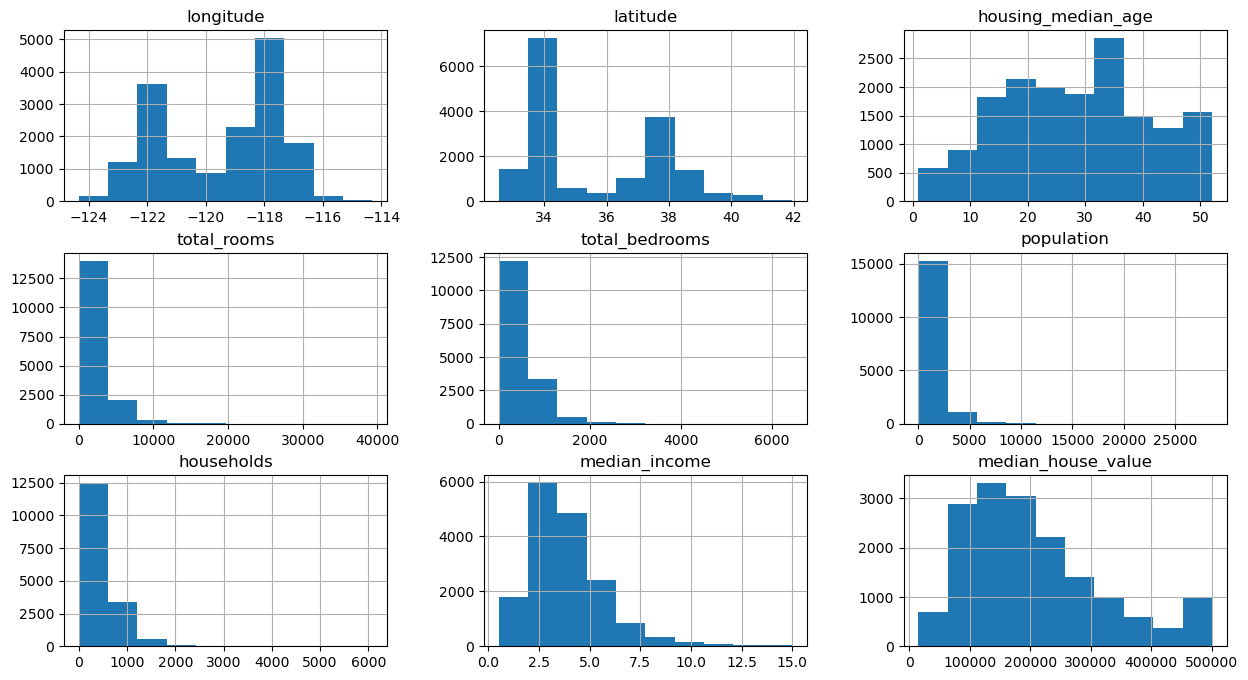

In [22]:
train_data.hist(figsize=(15, 8))

<Axes: >

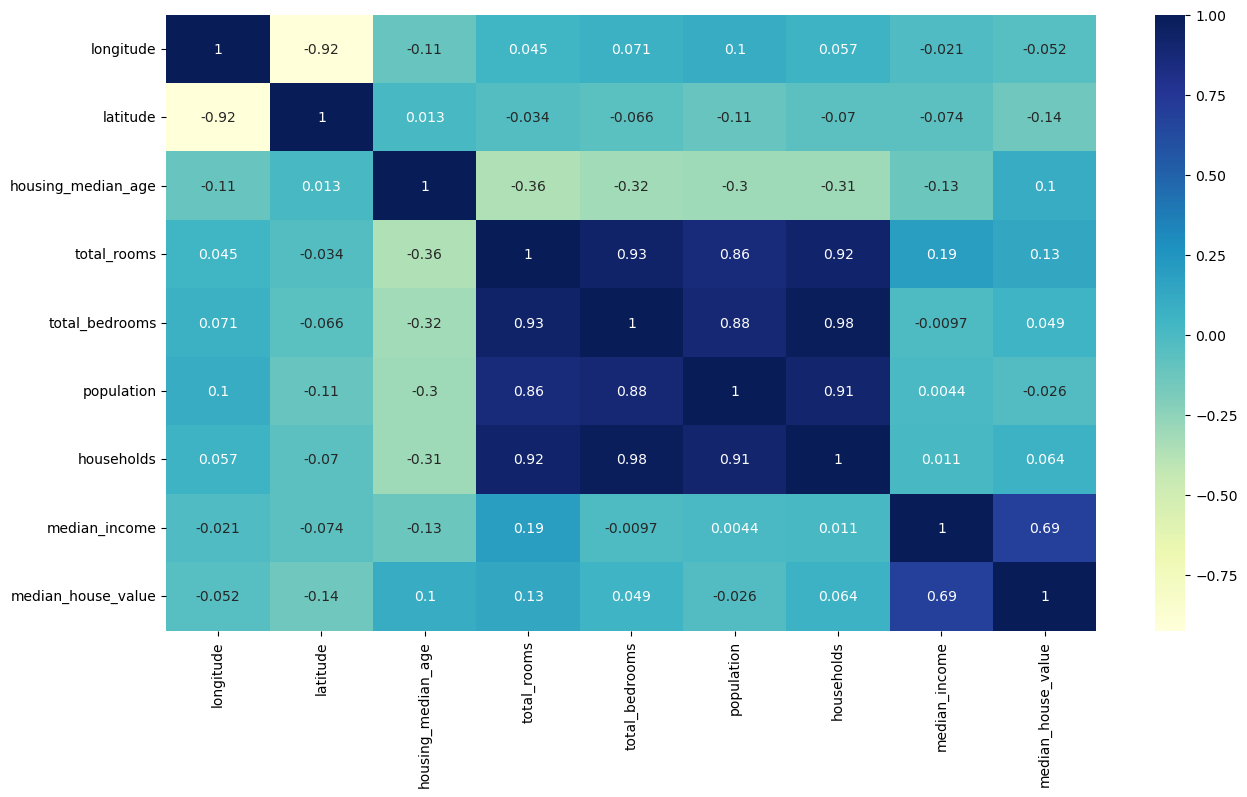

In [28]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [29]:
train_data['total_rooms']= np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms'] +1)
train_data['population']= np.log(train_data['population'] +1)
train_data['households']= np.log(train_data['households'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

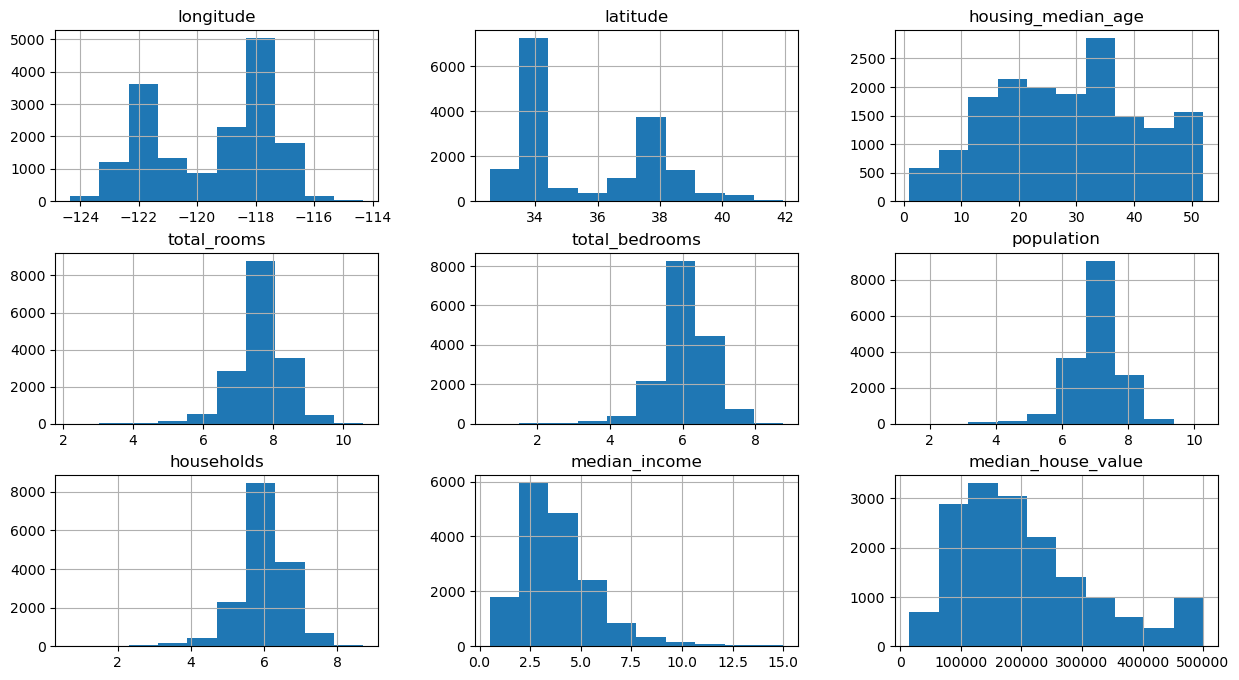

In [30]:
train_data.hist(figsize=(15, 8))

In [31]:
pd.get_dummies(train_data.ocean

ocean_proximity
<1H OCEAN     7315
INLAND        5275
NEAR OCEAN    2099
NEAR BAY      1819
ISLAND           4
Name: count, dtype: int64